In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits


In [2]:
Target = fits.open('Data/final_Ha.fits')
Target_image=Target[0].data

radius = 750
center = (2250, 1750)
N = 25

Target_image.shape

(3580, 4454)

In [3]:
#Find an array of radii to have N concentric disks of equal area
def Rimming(radius,N):
    r = []
    r.append(0)
    TotalArea = np.pi*(radius**2)
    Partition = TotalArea/N
    for i in range(1,N+1):
        r.append(np.sqrt(Partition/np.pi + r[i-1]**2))
    return r
    

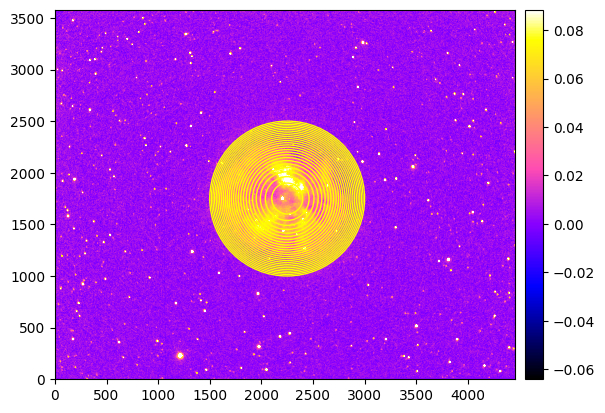

In [4]:
r = Rimming(radius,N)
plt.imshow(Target_image, clim=np.quantile(Target_image, [0.01, 0.99]), cmap='gnuplot2', origin='lower')
plt.colorbar(fraction=0.0375, pad=0.02)
circle = []
for i in range(len(r)):
    circle.append(plt.Circle(center,r[i],color='yellow',fill=False))
    plt.gca().add_patch(circle[i])

In [5]:
# Function to cover the nebula with a circular mask
def Create_Circular_Mask(r1, r2, image=Target_image, h=3580, w=4454, center=center, cmap='gnuplot2'):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask_int = dist_from_center >= r1
    mask_ext = dist_from_center < r2
    mask_tot = np.logical_and(mask_int, mask_ext)
        
    # Plot the results
    circ_int = plt.Circle(center, r1, color='black', fill=False)
    circ_ext = plt.Circle(center, r2, color='black', fill=False)

    Rim_flux = np.sum(np.where(mask_tot, image, 0))

    return Rim_flux

'''
    fig, axes = plt.subplots(1, 2, figsize=(21, 7))
    ax = axes[0]
    img = ax.imshow(image, clim=np.quantile(image, [0.01, 0.99]), cmap=cmap, origin='lower')
    cax = fig.add_axes([0.465, 0.11, 0.015, 0.77])
    fig.colorbar(img, cax=cax)
    ax.add_patch(circ_int)
    ax.add_patch(circ_ext)

    
    ax = axes[1]
    img = ax.imshow(np.where(mask_tot, image, 0), clim=np.quantile(np.where(mask_tot, image, 0), [0.01, 0.99]), cmap=cmap, origin='lower')
    cax = fig.add_axes([0.887, 0.11, 0.015, 0.77])
    fig.colorbar(img, cax=cax);
'''    


"\n    fig, axes = plt.subplots(1, 2, figsize=(21, 7))\n    ax = axes[0]\n    img = ax.imshow(image, clim=np.quantile(image, [0.01, 0.99]), cmap=cmap, origin='lower')\n    cax = fig.add_axes([0.465, 0.11, 0.015, 0.77])\n    fig.colorbar(img, cax=cax)\n    ax.add_patch(circ_int)\n    ax.add_patch(circ_ext)\n\n    \n    ax = axes[1]\n    img = ax.imshow(np.where(mask_tot, image, 0), clim=np.quantile(np.where(mask_tot, image, 0), [0.01, 0.99]), cmap=cmap, origin='lower')\n    cax = fig.add_axes([0.887, 0.11, 0.015, 0.77])\n    fig.colorbar(img, cax=cax);\n"

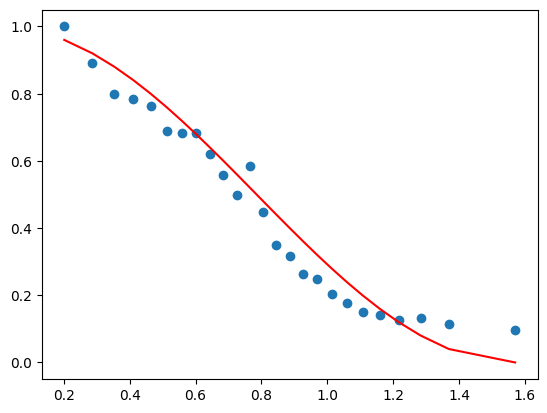

In [6]:
Rim = []
for i in range(1,len(r)):
    Rim.append(np.sum(Create_Circular_Mask(r1=r[i-1], r2=r[i])))

theta = np.arcsin(np.array(r)/radius)
plt.scatter(theta[1:],Rim/np.max(Rim))
plt.plot(theta[1:],np.cos(theta[1:])**2,color='red')